## The questions answered in this analysis were inspired by an article that came into my phone's __[newsfeed](https://www.accuweather.com/en/weather-forecasts/record-heat-wave-in-phoenix-could-end-with-a-bang/1564900)__ regarding Phoenix's hot weather this year. Phoenix has observed 34 days of over 110 degrees for the current year 2023. I wanted to know how likely it is to see this.


https://www.accuweather.com/en/weather-forecasts/record-heat-wave-in-phoenix-could-end-with-a-bang/1564900

## As an alumni of Arizona State Univserity, I enjoyed my time in Phoenix, and decided to gather some data and ask my own questions.

## In the below analysis we will walk through a few simple calculations to understand if we are observing more days above 110 degrees, what is the probability of observing more years like this year, and what type of trend are we on for the future.

## Tools used: <br>1. Descriptive statisical methods <br>2. Linear Regression <br>3. Cumulative Denisty probability functions <br>4. Data visualization

In [110]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [111]:
#reading in the data & and some column clean up
filepath = r'C:\Users\RyanMiller\OneDrive - MVMNT\Desktop\Data Science\phx_weather.csv'
raw_data = pd.read_csv(filepath)
raw_data.rename(columns={'Days >= 110': 'count'}, inplace=True)

#display first 5 rows
raw_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,count,Year.1
0,1950,0,0,0,0,0,2,3,2,1,0,0,0,8,1950
1,1951,0,0,0,0,2,0,6,0,0,0,0,0,8,1951
2,1952,0,0,0,0,0,1,2,1,1,0,0,0,5,1952
3,1953,0,0,0,0,0,4,2,1,0,0,0,0,7,1953
4,1954,0,0,0,0,0,2,3,0,0,0,0,0,5,1954


In [112]:
# find the mean and std dev of the data set.
mean = raw_data['count'].mean()
std = raw_data['count'].std()
print('Mean = ', mean)
print('Std Dev = ', std)

Mean =  16.73972602739726
Std Dev =  9.130272293098312


### From these quick calculations, using the timeframe 1950-2022 the mean number of days above 110 degrees that Phoenix see's is 16.73.

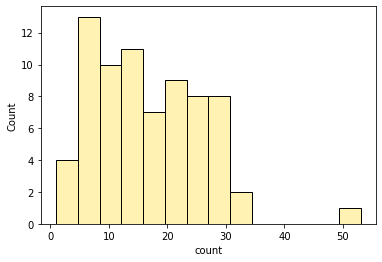

<function matplotlib.pyplot.clf()>

In [96]:
#gistogram of the data going back to 1950
sns.histplot(data=raw_data, x='count', color = "gold", alpha = 0.3, bins = 14)
plt.show()
plt.clf

### Worth checking out that outlier up at 53 from 2020, throwing off the dataset.

## How likely are we to see another year like this year, 34 or more observations, when it comes to days above 110 degrees in PHX?

In [113]:
phx = {}
temps = range(1,len(raw_data['count']))

for key in temps:
    phx[key] = 0

probs = []

for i in temps:
    temp = 1 - stats.norm.cdf(i, mean, std)
    probs.append(temp)

for i in range(len(temps)):
    key = temps[i]
    value = probs[i]
    phx[key] = value

print(phx)

{1: 0.9576375419757809, 2: 0.946777451331542, 3: 0.9338191809084371, 4: 0.9185415477972569, 5: 0.9007439837913144, 6: 0.8802578265755583, 7: 0.8569578282077857, 8: 0.8307731806778553, 9: 0.8016972900202908, 10: 0.7697955203275066, 11: 0.7352101860072899, 12: 0.6981621972931643, 13: 0.6589489553956356, 14: 0.617938337116851, 15: 0.5755588846917832, 16: 0.5322866004417837, 17: 0.4886290104655008, 18: 0.445107380666637, 19: 0.4022381194283253, 20: 0.3605144683844691, 21: 0.3203895589115042, 22: 0.28226179969331744, 23: 0.24646337181699285, 24: 0.2132523619382629, 25: 0.18280878601887518, 26: 0.15523447312612926, 27: 0.13055651696018755, 28: 0.10873378440254333, 29: 0.08966581158745979, 30: 0.07320332747140379, 31: 0.05915962357760585, 32: 0.047322030464131304, 33: 0.03746285489528178, 34: 0.029349261499009738, 35: 0.022751732242460854, 36: 0.017450890307343037, 37: 0.013242618071128809, 38: 0.009941521411127696, 39: 0.007382887829535112, 40: 0.0054233511886429, 41: 0.003940511783124934, 4

### Based on the historical data fro 1950,  there is a less than 3% (2.9%) chance to see 34 or more days above 110 degrees in Phoenix. That seems a bit low, so, what does the trend look like for the number of days above 110 degrees look like since 1950?

### Is there a correlation between years and number of days above 110 degrees in Phx? 

### i.e. are we seeing more days above 110 as the years go by? If so, how quickly are we seeing an increase? (Linear Regression)

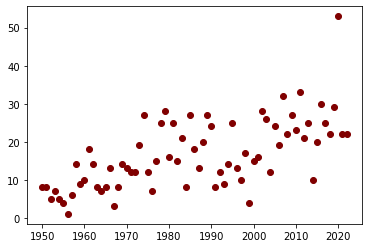

<Figure size 432x288 with 0 Axes>

In [95]:
#Scatter plot to visualize any trending
plt.scatter(x=raw_data['Year'], y = raw_data['count'], color = 'maroon')
plt.show()
plt.clf()

### There appears to be a trend visually, but what does the SLR, simple linear regression, look like if we fit a line to this data?

In [74]:
model = sm.OLS.from_formula('count ~ Year', raw_data)
results = model.fit()
print(results.params)

Intercept   -533.190855
Year           0.276904
dtype: float64


### Looks like were seeing a quarter of a day increase every year, or every 4 years we gain an extra day above 110 degrees.  What does this look like on a graph?

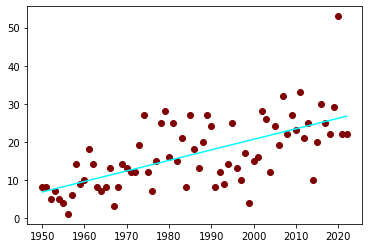

<function matplotlib.pyplot.clf()>

In [100]:
plt.scatter(raw_data['Year'], raw_data['count'], color = 'maroon')
plt.plot(raw_data['Year'], results.params[0] + results.params[1]*raw_data['Year'], color = 'aqua')
plt.show()
plt.clf

### When will this current year's (2023) mark of 34 days above 110 degrees be the norm?

In [118]:
#trial and error with the values to find the approximate year
x = 2049

# regression equation using found slope and intecept in cell 100

y = results.params[0] + results.params[1]*x
y2 = round(y,1)
print("By the year ", x, " we will see ", y2, "days above 110 degrees")

By the year  2049  we will see  34.2 days above 110 degrees


### It appears, based on the dataset, by the year 2049, on average we will expect to see more than 34 days above 110 degrees in PHX.

## Going back to the question of how likely we are to see more than 34 days above 110 degrees in PHX:  we calculated a 2.9% chance of seeing more than 34 days above 110 if we use the data going all the way back to 1950. 

## However, from the scatter plot we see that there is a clear rising in the number of days observed. So, if we use a sample size of the last 30 years, what is the probability we observe 34 or more? 

In [102]:
#taking a subsection of the data set from the last 30 years.
new_df = raw_data[(raw_data.Year > 1991)]

new_df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,count,Year.1
68,2018,0,0,0,0,0,5,10,7,0,0,0,0,22,2018
69,2019,0,0,0,0,0,4,11,12,2,0,0,0,29,2019
70,2020,0,0,0,0,2,7,19,22,3,0,0,0,53,2020
71,2021,0,0,0,0,0,11,6,4,1,0,0,0,22,2021
72,2022,0,0,0,0,0,6,14,1,1,0,0,0,22,2022


In [103]:
#calcualte the new mean and standard deviation
new_mean = new_df['count'].mean()
new_std = new_df['count'].std()
print("The mean days above 110 degrees in PHX since 1992 is: ", new_mean)
print("The std deviation of days above 110 degrees in PHX since 1992 is: ", new_std)

The mean days above 110 degrees in PHX since 1992 is:  21.29032258064516
The std deviation of days above 110 degrees in PHX since 1992 is:  9.37796548080338


### The mean number of days observed above 110 increased from 16.7 to 21.3. The standard deviation stays the same at about 9. 

### But, from this as well as the scatter plot, we can see that the number of hot days above 110 degrees observed per year is increasing.



## Let's calculate the new probability given this new data set consisting of only the last 30 years (since 1992).
## We should expect to see a higher probability, given we've uncovered there is a rise in the number of days observed above 110 degrees per year.

In [107]:

phx2 = {}
temps2 = range(1,len(raw_data['count']))

#Creating blank data dictionary
for key in temps2:
    phx2[key] = 0



#calacualte the probability of observing more than "X" amount of days above 110 degrees, store in list.
probs2 = []
for i in temps2:
    temp = 1 - stats.norm.cdf(i, new_mean, new_std)
    probs2.append(temp)

#storing all valuesin data dictionary, matching corresponding number of days to probability.
for i in range(len(temps2)):
    key = temps2[i]
    value = probs2[i]
    phx2[key] = value

print(phx2)

{1: 0.9847531100137444, 2: 0.9801561053881391, 3: 0.9744328398047789, 4: 0.9673878666369873, 5: 0.958813910181081, 6: 0.9484969990140921, 7: 0.9362230420281644, 8: 0.9217857416595885, 9: 0.9049956186739601, 10: 0.8856897986402552, 11: 0.8637420932850803, 12: 0.8390728128860725, 13: 0.8116576813205396, 14: 0.7815352043519157, 15: 0.7488118721247202, 16: 0.713664662092221, 17: 0.6763404467400626, 18: 0.6371520937249835, 19: 0.5964712612035938, 20: 0.5547181205854694, 21: 0.5123484624408261, 22: 0.46983883805079574, 23: 0.4276705401701043, 24: 0.3863133170951767, 25: 0.34620973505296593, 26: 0.30776105314471214, 27: 0.27131535768920834, 28: 0.2371585304816587, 29: 0.20550841504877715, 30: 0.1765123164312169, 31: 0.1502477442043666, 32: 0.12672610474752855, 33: 0.1058988831238108, 34: 0.0876657383597923, 35: 0.0718838737554982, 36: 0.058378035734876876, 37: 0.0469505352027606, 38: 0.037390765009171045, 39: 0.029483794070148006, 40: 0.02301774018210001, 41: 0.017789747360036468, 42: 0.01361

## Looks like there is a 9% (8.7%) chance that we see more than 34 days above 110 degrees, in any given year,  in PHX nowadays based on the warming we've seen in recent years. 

## What did we learn here: 
### The mean number of days above 110 degrees per year is rising. We are seeing more extremely hot days per year.
### As it stands currently, there is a above a 9% chance we see another year with 34 or more observations of days above 110 in PHX.
### By the year 2049, we can expect a full months worth of heat (34 or more days) to be the norm (mean) baed on the trend.

# Stay cool!

### Bonus: because of the trend of more hot days observed, let's looks at the histogram of data from 1950 to 2022 and compare it to the last thirty years of  data: 1992-2022. Of course, we'll have to normalize the data to ensure we are comparing evenly due to the difference in number of observations.

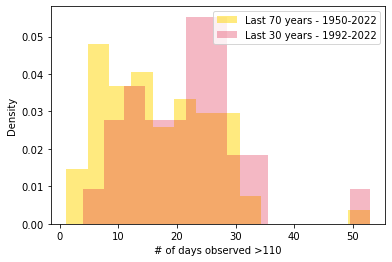

<Figure size 432x288 with 0 Axes>

In [138]:
plt.hist(data=raw_data, x='count', label="Last 70 years - 1950-2022", density=True, alpha=0.5, bins = 14, color = "gold")
plt.hist(data=new_df, x='count', label="Last 30 years - 1992-2022", density=True, alpha=0.3, bins = 14, color = "crimson")
plt.legend()
plt.xlabel("# of days observed >110")
plt.ylabel("Density")
plt.show()
plt.clf()

### This helps visualize and confirm the shift/trend towards more days above 110 degrees observed per year in PHX. If we look on the X-Axis, between the 20-30 range, we see the large block of red, with not overlap of yellow, signaling the last 30 years has a grater number of days above 110 degrees observed per year.